# Excercises

## Conceptual

1)
Indicate whether we would generally expect the performance of a flexible statistical learning method to be better 
or worse than an inflexible method. Justify your answer. 

    a) For large n and small p we would expect an inflexible model to be better in order to avoid overfitting. 

    b) For large p and small n we would expect a flexible model to perform better in order to capture more information from the limited number of data points. 

    c) A more flexible model is better at capturing highly non linear relationships. More flexible is inherintly less restricting. 

    d) A less flexible model is better suited where the irreducible error is high. The high error rate can lead to overfitting. 
   

2) Explain whether each scenario is a regression or a classification problem and indicate whether we are most interested in inference or prediction. Provide n and p. 

    a) This is a regression problem and an inference problem. n = 500. p = profit, employees, industry, CEO salary. 

    b) This is a classification problem and we are most interested in prediction. n = 20, p = succes/failure, price, marketing budget, competition price, 10 other variables. 
    

    c) This is a regression problem and we are most interested in predition. n = 52 weeks, p = % change in $, %change in US market, % change in british market, % change in german market. 

3) Bias-variance decomposition 

    a) 
    
    - Bias drops significantly with increased flexibility at first then continues to gradually drop with increased flexibility. 
    - Variance increases with increased flexibility. 
    - Training error decreases with model flexibility. 
    - Test error first decreases with model flexibility to an optimum point then begins to increase again.
    - The irreducible error remains flat with increasing flesibility. 

    b) 
    - Bias is difference from the chosen model and reality. The bias is generally high with an inflexibile model becuase its difficult to model a real world phenomenon with with few variables. Bias decreases significantly when the model becomes more flexibile and can more closely resemble the true event. 
    - Variance is the difference in the model between different sets of training data. If the model is more flexible it will cover every point more closely and therefore increasing the difference between datasets. 
    - As model flexibility increases, the training set can be fitted perfectly to a model with zero MSE. This is why its important to test the model with a test set because thats what really counts. 
    - Test error decreases with flexibility at first, because some flexibility is useful. However, if flexibility continues to increase, there will be higher and higher error with the test set because of over fitting. 
    - The irreducible error has to do with the nature of data and how it was collected and many other uncontrollable and irreducible factors. Model flexibility has zero effect on irreducible error. 

4) Some real application of statistical learning

    a) ONE real life application where classification is useful: Utilizing transcriptomics data in order to identify short non-coding RNA or sRNA. The response would be expressed short reads in the intergenic region. Predictors are: length of the expressed region (only short length expression is desired), the annotation of the region as integenic (sRNA are generally encoded in the intergenic region). 
    
    b) ONE real life example of regression problem: Try to predict if the effects of minimum wage increase on the economy. Response: gdp, unemplyment rate, education rate. Predictors: minimum wage. 
    
    c) ONE real life example of classification of clustering problem: How to cluster genes that are co-regulated during a matbaolic transition. Response: clusters of genes. Predictors: gene expression level across time course samples. 

5) A very flexible model will reduce bias but it will increase variance which will increase the test error. 

6) A parametric approach attempts to use a rigid formula for the parameters to describe the model. A non parametric approach is generally more complex method to describe the model without making an assumption about the mathematical model of the phenomena. Non parametric approaches require large number of observations, and are more flexible. 

7) Training data set with 6 observations, 3 predictors and 1 response (qualitative). 

    a) Euclidean distance is the n dimensional geometric distance. The distance between test point and each observation is... 
        Obs 1: [(0-0)^2 + (3-0)^2 + (0-0)^2] ^(1/2) = 3
        Obs 2: [(2-0)^2 + (0-0)^2 + (0-0)^2] ^(1/2) = 2
        Obs 3: [[0-0)^2 + (0-1)^2 + (0-3)^2] ^(1/2) = 10^(1/2) = 3.16
        Obs 4: [[0-0)^2 + (0-1)^2 + (0-2)^2] ^(1/2) = 5^(1/2) = 2.24
        Obs 5: [(0--1)^2 + (0-0)^2 + (0-1)^2] ^(1/2) = 2^(1/2) = 1.41
        Obs 6: [(0-1)^2 + (0-1)^2 + (0-1)^2] ^(1/2) = 3^(1/2) = 1.73

    b) with k = 1, the K-nearest neighbors would predict green, because Obs 5 is the closest(smallest euclidean distance away).

    c) with k = 3, the 3 closest observations are Obs5(green), Obs6(red), and Obs2(red). KNN would predict red because thats the highest probability outcome based on 3 nearest neighbors. 

    d) A small K value will allow the dicision boundry to be mapped more tightly. A large K number means would smear the non linear dicision boundry. 

## Applied

8) Use the applied College.csv dataset.

    a) use the pandas read_csv() to import the data into pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

#import seaborn 
#seaborn.set()
college = pd.read_csv("College.csv")

    b) Explore the data and remove the first unnamed row column of all the universities.

In [2]:
college.shape #the shape of the overall dataframe (rows,columns)

(777, 19)

In [3]:
college.columns # the names of the columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [4]:
college["Room.Board"].describe() #basic stats for a given column 

count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64

In [5]:
college.head() # first five rows of college data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
college_v1 = college.iloc[:,1:] #create a new data frame with all rows (:), and columns from first to all (1:)
college_v1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


    c) 
        i) Produce a summary of each feature in the dataset. 

In [7]:
college_v1.describe() #basic statistics for each column 

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


    c) 
        ii) Produce a scatterplot matrix of the first 10 columns . 

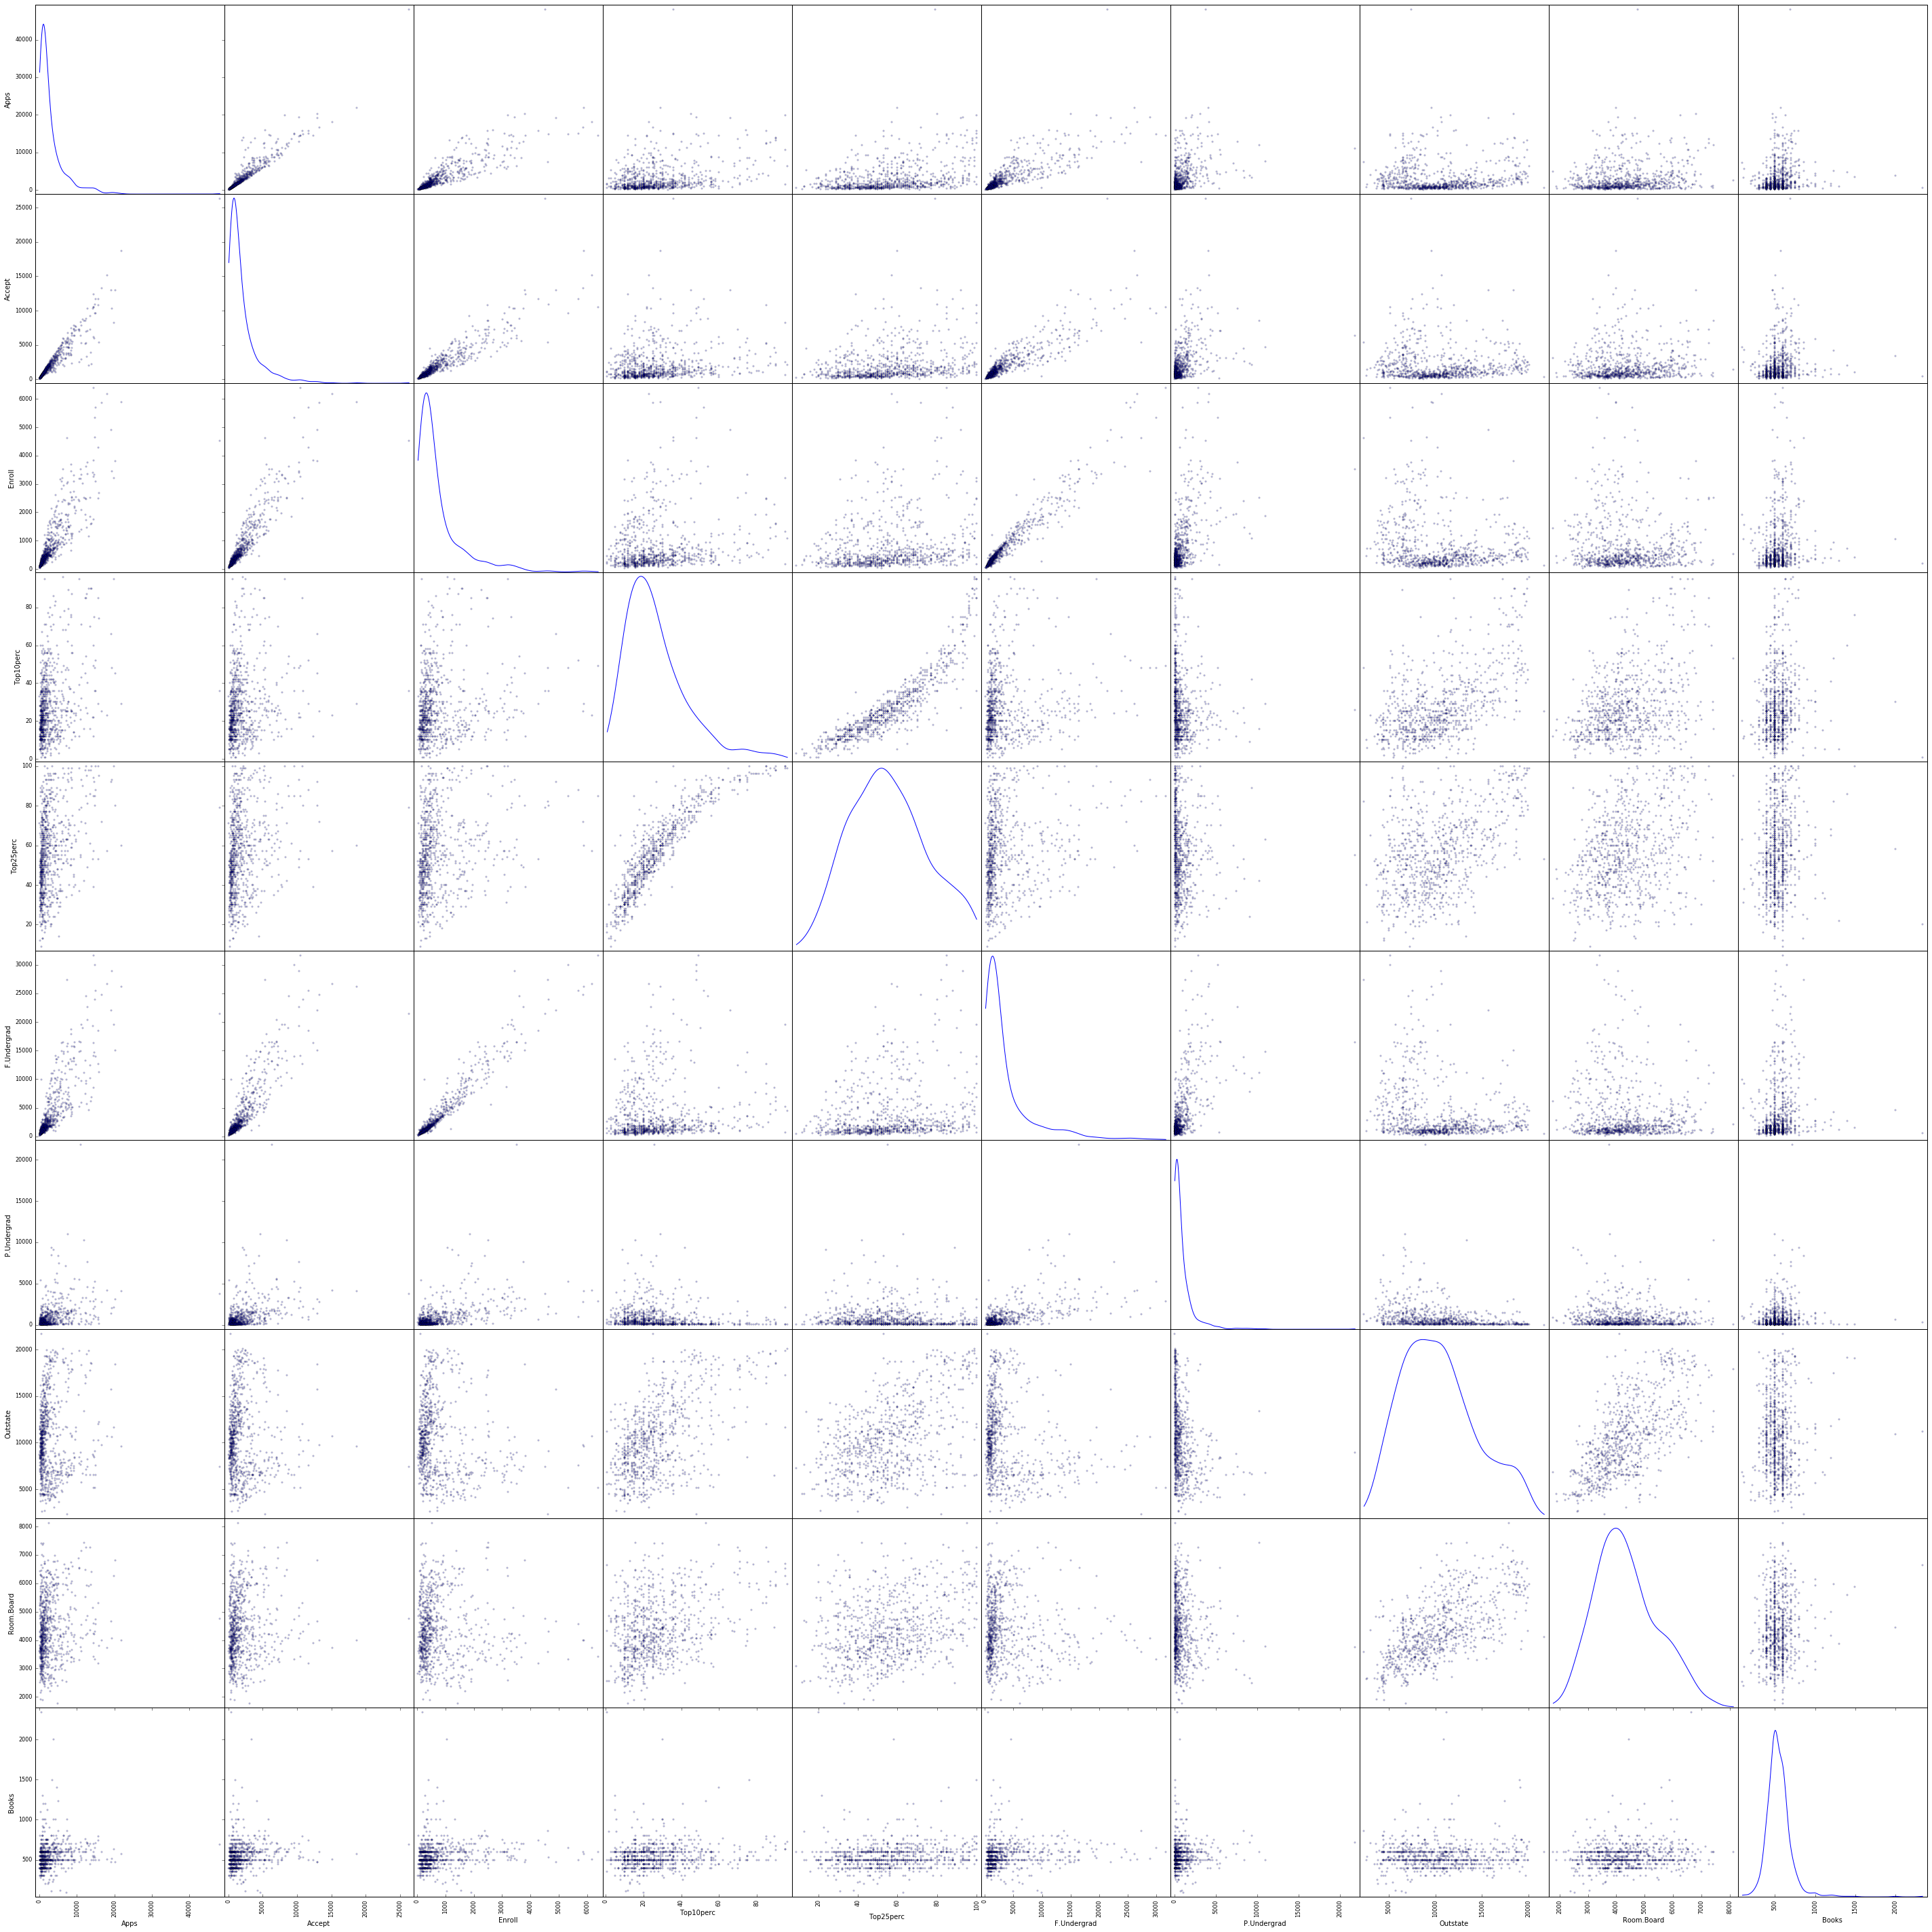

In [8]:
axes = pd.tools.plotting.scatter_matrix(college_v1.iloc[:,:11], alpha=0.2, figsize=(50, 50), diagonal='kde') 

In [9]:
plt.savefig('scatter_matrix.png')

    c) 
        iii) create a side by side box plot of out of state vs private. 

In [10]:
college[["Outstate","Private"]] # the columns that we care about 

,Outstate,Private
0,7440,Yes
1,12280,Yes
2,11250,Yes
3,12960,Yes
4,7560,Yes
5,13500,Yes
6,13290,Yes
7,13868,Yes
8,15595,Yes
9,10468,Yes


In [11]:
college.groupby("Private")["Outstate"].describe()  #grouped by "Private" over Outstate with the describe statistic

Private       
No       count      212.000000
         mean      6813.410377
         std       2145.248389
         min       2580.000000
         25%       5366.000000
         50%       6609.000000
         75%       7844.000000
         max      15732.000000
Yes      count      565.000000
         mean     11801.693805
         std       3707.470822
         min       2340.000000
         25%       9100.000000
         50%      11200.000000
         75%      13970.000000
         max      21700.000000
dtype: float64

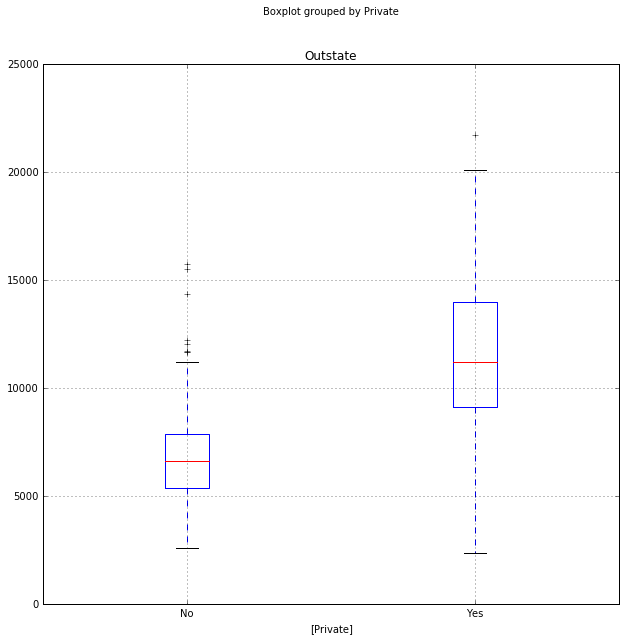

In [12]:
college.boxplot(column=["Outstate"], by = ["Private"], figsize=(10, 10))
plt.savefig('Outstate_Private_boxplot.png')

    c) 
        iv) Binning: create a new column titled "Elite" with qualitative data indicating whether >50% of the incoming 
            students were in the top 10% of their high school graduating class. 

In [13]:
college["Top10perc"].describe()  # lets see the distribution of the "Top10perc" column 

count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64

In [14]:
elite_bins = [0, 50, 100] # will use this list to creates 2 bins, 0-50, and 50-100
bin_names = ["No", "Yes"] # will use this list to create names for the bins 
groups = pd.cut(college["Top10perc"], bins = elite_bins, labels = bin_names) #creating binned data

In [15]:
college["Elite"] = groups #incorporating binned data into the table as "Elite" column. 
college #take a look

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,No
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,No
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,No
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,No
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52,No


In [16]:
college.groupby("Elite")["Outstate"].describe()  #stats for elite and non elite out of state tuition 

Elite       
No     count      699.000000
       mean      9904.165951
       std       3640.558534
       min       2340.000000
       25%       7070.000000
       50%       9556.000000
       75%      12155.000000
       max      21700.000000
Yes    count       78.000000
       mean     15248.564103
       std       4115.230670
       min       5224.000000
       25%      12219.000000
       50%      16950.000000
       75%      18411.500000
       max      20100.000000
dtype: float64

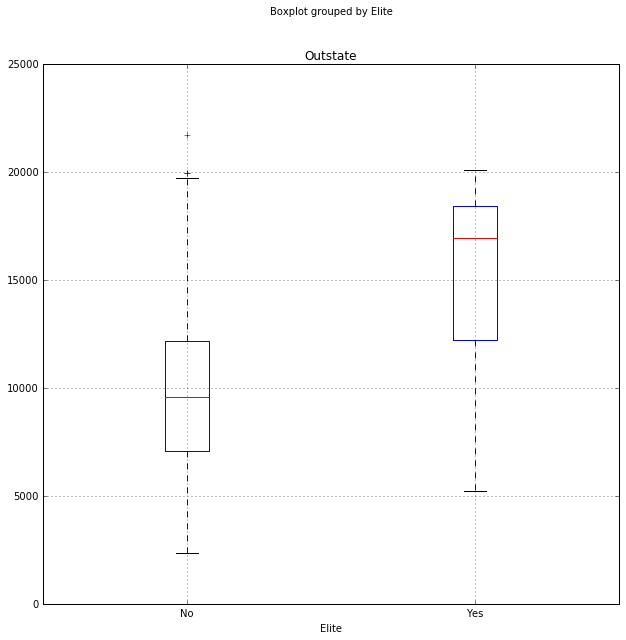

In [17]:
college.boxplot(column = "Outstate", by = "Elite", figsize = (10,10)) #boxplot comparison of outstate tuition 
plt.savefig('outstate_elite_boxplot.png')

    c) 
        v) Binning: create a quantitative bin for one of the parameters and then create a box plot for it. 

In [18]:
#will bin on number of applications recieved, and then create boxplots for the faculty student ratio vs bins 

In [19]:
college.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate', 'Elite'],
      dtype='object')

In [20]:
college["Apps"].describe()

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x115375eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x115380898>,
 'fliers': [<matplotlib.lines.Line2D at 0x115386a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115386208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x115375ba8>,
  <matplotlib.lines.Line2D at 0x11537bf60>]}

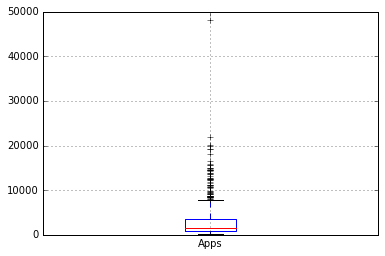

In [21]:
college.boxplot(column = "Apps") #dont like the far outlier, gonna remove that sucker 

In [22]:
college.Apps.max() #find the max outlier 

48094

In [23]:
college.Apps[college.Apps == 48094].index.tolist() #create a bool list from Apps column if value is 48094, then pass 
                                                    #the bool list to the column and return the index list if True 

[483]

In [24]:
college.Apps.loc[483] #just checking the value of index 483 in column Apps, lets drop this value. 

48094

In [25]:
college.loc[483,:] #yeah lets drop Rutgers

Unnamed: 0     Rutgers at New Brunswick
Private                              No
Apps                              48094
Accept                            26330
Enroll                             4520
Top10perc                            36
Top25perc                            79
F.Undergrad                       21401
P.Undergrad                        3712
Outstate                           7410
Room.Board                         4748
Books                               690
Personal                           2009
PhD                                  90
Terminal                             95
S.F.Ratio                          19.5
perc.alumni                          19
Expend                            10474
Grad.Rate                            77
Elite                                No
Name: 483, dtype: object

In [26]:
college.drop([483], inplace = True) #default is axis = 0, meaning it will drop row with index = 483 (not necessarily the 483rd row)

In [27]:
college.iloc[480:485,:] #gone baby! 

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
480,Rollins College,Yes,1777,1151,382,31,55,1668,1052,16425,5220,955,750,81,85,13.3,23,11561,90,No
481,Rosary College,Yes,434,321,141,28,53,624,269,10950,4600,550,950,79,82,12.9,30,9264,81,No
482,Rowan College of New Jersey,No,3820,1431,695,21,70,5303,3942,4356,4830,800,800,76,81,22.1,6,7252,51,No
484,Rutgers State University at Camden,No,3366,1752,232,27,79,2585,1300,7411,4748,690,2009,90,95,18.6,12,10134,57,No
485,Rutgers State University at Newark,No,5785,2690,499,26,62,4005,1886,7410,4748,690,2009,90,95,17.4,16,11878,58,No


/Users/alexeygilman/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1153dc470>],
 'caps': [<matplotlib.lines.Line2D at 0x1153e3e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1153e7f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1153e7780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1153dcda0>,
  <matplotlib.lines.Line2D at 0x1153dceb8>]}

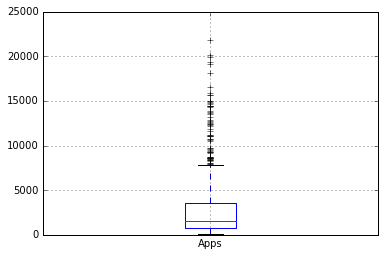

In [28]:
college.boxplot(column = "Apps") 

In [29]:
Apps_bins = [0,5000,10000,15000,20000,25000]
Apps_groups = ["0_5k", "5k_10k", "10k_15k", "15k_20k", "20k_25k"]
Binned_apps = pd.cut(college["Apps"], bins = Apps_bins, labels = Apps_groups)
college["Binned_Apps"] = Binned_apps

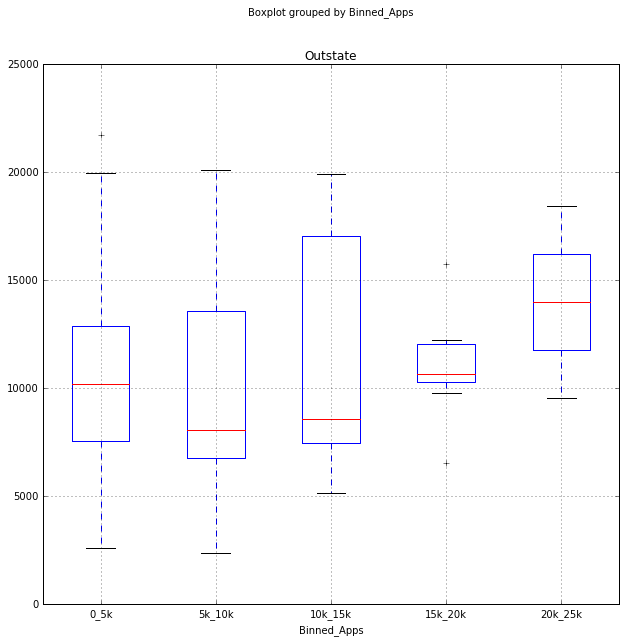

In [30]:
college.boxplot(column = "Outstate", by = "Binned_Apps", figsize = (10,10))
plt.savefig('outstate_binned_apps_boxplot.png')

9) This will use the autodata. Upload the data and remove any missing values. 

In [31]:
auto = pd.read_csv("Auto.csv")

In [32]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [33]:
auto.shape

(397, 9)

In [34]:
auto = auto.dropna()

In [35]:
auto.shape

(397, 9)

In [36]:
auto.isnull()  #useful to check for null values 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [37]:
auto.isnull().any(axis=1) #the any feature!!! will look if any along axis = 1 are true, so any along any row. 

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
367    False
368    False
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
dtype: bool

In [38]:
null_data = auto[auto.isnull().any(axis=1)] #there is no null data. 
null_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


    9
        a) Which preictors are quantitative and which are qualitative?

    All are quantitative except for "origin" and "name"

    9
        b) what is the range of each qualitative predictor 

In [39]:
# how come "horsepower" doesnt have a descibe result? 
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [40]:
#creating a function

def minmax(x):
    return pd.Series(index = ["min","max",], data = [x.min(), x.max()])

auto_minmax = auto.apply(minmax)

auto_minmax

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
min,9.0,3,68,100,1613,8.0,70,1,amc ambassador brougham
max,46.6,8,455,?,5140,24.8,82,3,vw rabbit custom


In [41]:
#When running the describe method, horsepower is not one of the columns, and here the max value is "?"
#lets review what data types our dataframe is composed of... 
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [42]:
#horsepower column is an object!?!?!?!?
#lets take a closer look... 
auto.horsepower.apply(type) 

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
5      <class 'str'>
6      <class 'str'>
7      <class 'str'>
8      <class 'str'>
9      <class 'str'>
10     <class 'str'>
11     <class 'str'>
12     <class 'str'>
13     <class 'str'>
14     <class 'str'>
15     <class 'str'>
16     <class 'str'>
17     <class 'str'>
18     <class 'str'>
19     <class 'str'>
20     <class 'str'>
21     <class 'str'>
22     <class 'str'>
23     <class 'str'>
24     <class 'str'>
25     <class 'str'>
26     <class 'str'>
27     <class 'str'>
28     <class 'str'>
29     <class 'str'>
           ...      
367    <class 'str'>
368    <class 'str'>
369    <class 'str'>
370    <class 'str'>
371    <class 'str'>
372    <class 'str'>
373    <class 'str'>
374    <class 'str'>
375    <class 'str'>
376    <class 'str'>
377    <class 'str'>
378    <class 'str'>
379    <class 'str'>
380    <class 'str'>
381    <class 'str'>
382    <class 'str'>
383    <class

In [43]:
dtypeCount =[auto.horsepower.apply(type).value_counts() for i in range(auto.shape[1])] #counting types of data in 1 column 
dtypeCount[1]

<class 'str'>    397
Name: horsepower, dtype: int64

In [45]:
#so there are rows and all are strings - lets change them to floats?

#the following does not work becasue there are str values that cannot be converted to floats. i.e. "?" 
#new = auto["horsepower"].astype(float) 

In [46]:
#lets find out where and how many "?" we have, just out of curiosity 
auto[auto["horsepower"] == "?"]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98,?,2046,19.0,71,1,ford pinto
126,21.0,6,200,?,2875,17.0,74,1,ford maverick
330,40.9,4,85,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100,?,2320,15.8,81,2,renault 18i


In [47]:
#now lets change these values to floats and NAs 

In [48]:
auto["horsepower"] = pd.to_numeric(auto.horsepower, errors = "coerce")

In [49]:
auto.dtypes

#sweet, now horsepower is al floats with some NA's 

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [50]:
#now we have some null data, will need to keep this in mind. 
null_data = auto[auto.isnull().any(axis=1)] 
null_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100,NaN,2320,15.8,81,2,renault 18i


In [51]:
auto.describe().loc["max"] - auto.describe().loc["min"]

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64

9
    
    c) what is the mean and std of each qualitative predictor 

In [52]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


9

    d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [53]:
auto.iloc[10:86,:].index

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
            27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
            44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
            61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
            78, 79, 80, 81, 82, 83, 84, 85],
           dtype='int64')

In [54]:
auto_10_85_rm = auto.drop(auto.iloc[10:86,:].index)

In [55]:
auto_10_85_rm.shape

(321, 9)

In [56]:
auto_10_85_rm.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,317.000000,321.000000,321.000000,321.000000,321.000000
mean,24.444860,5.370717,187.174455,101.003155,2933.183801,15.709034,77.143302,1.598131
std,7.899928,1.653486,99.864568,36.003208,809.638650,2.706441,3.128202,0.816163
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,115.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


9

    e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

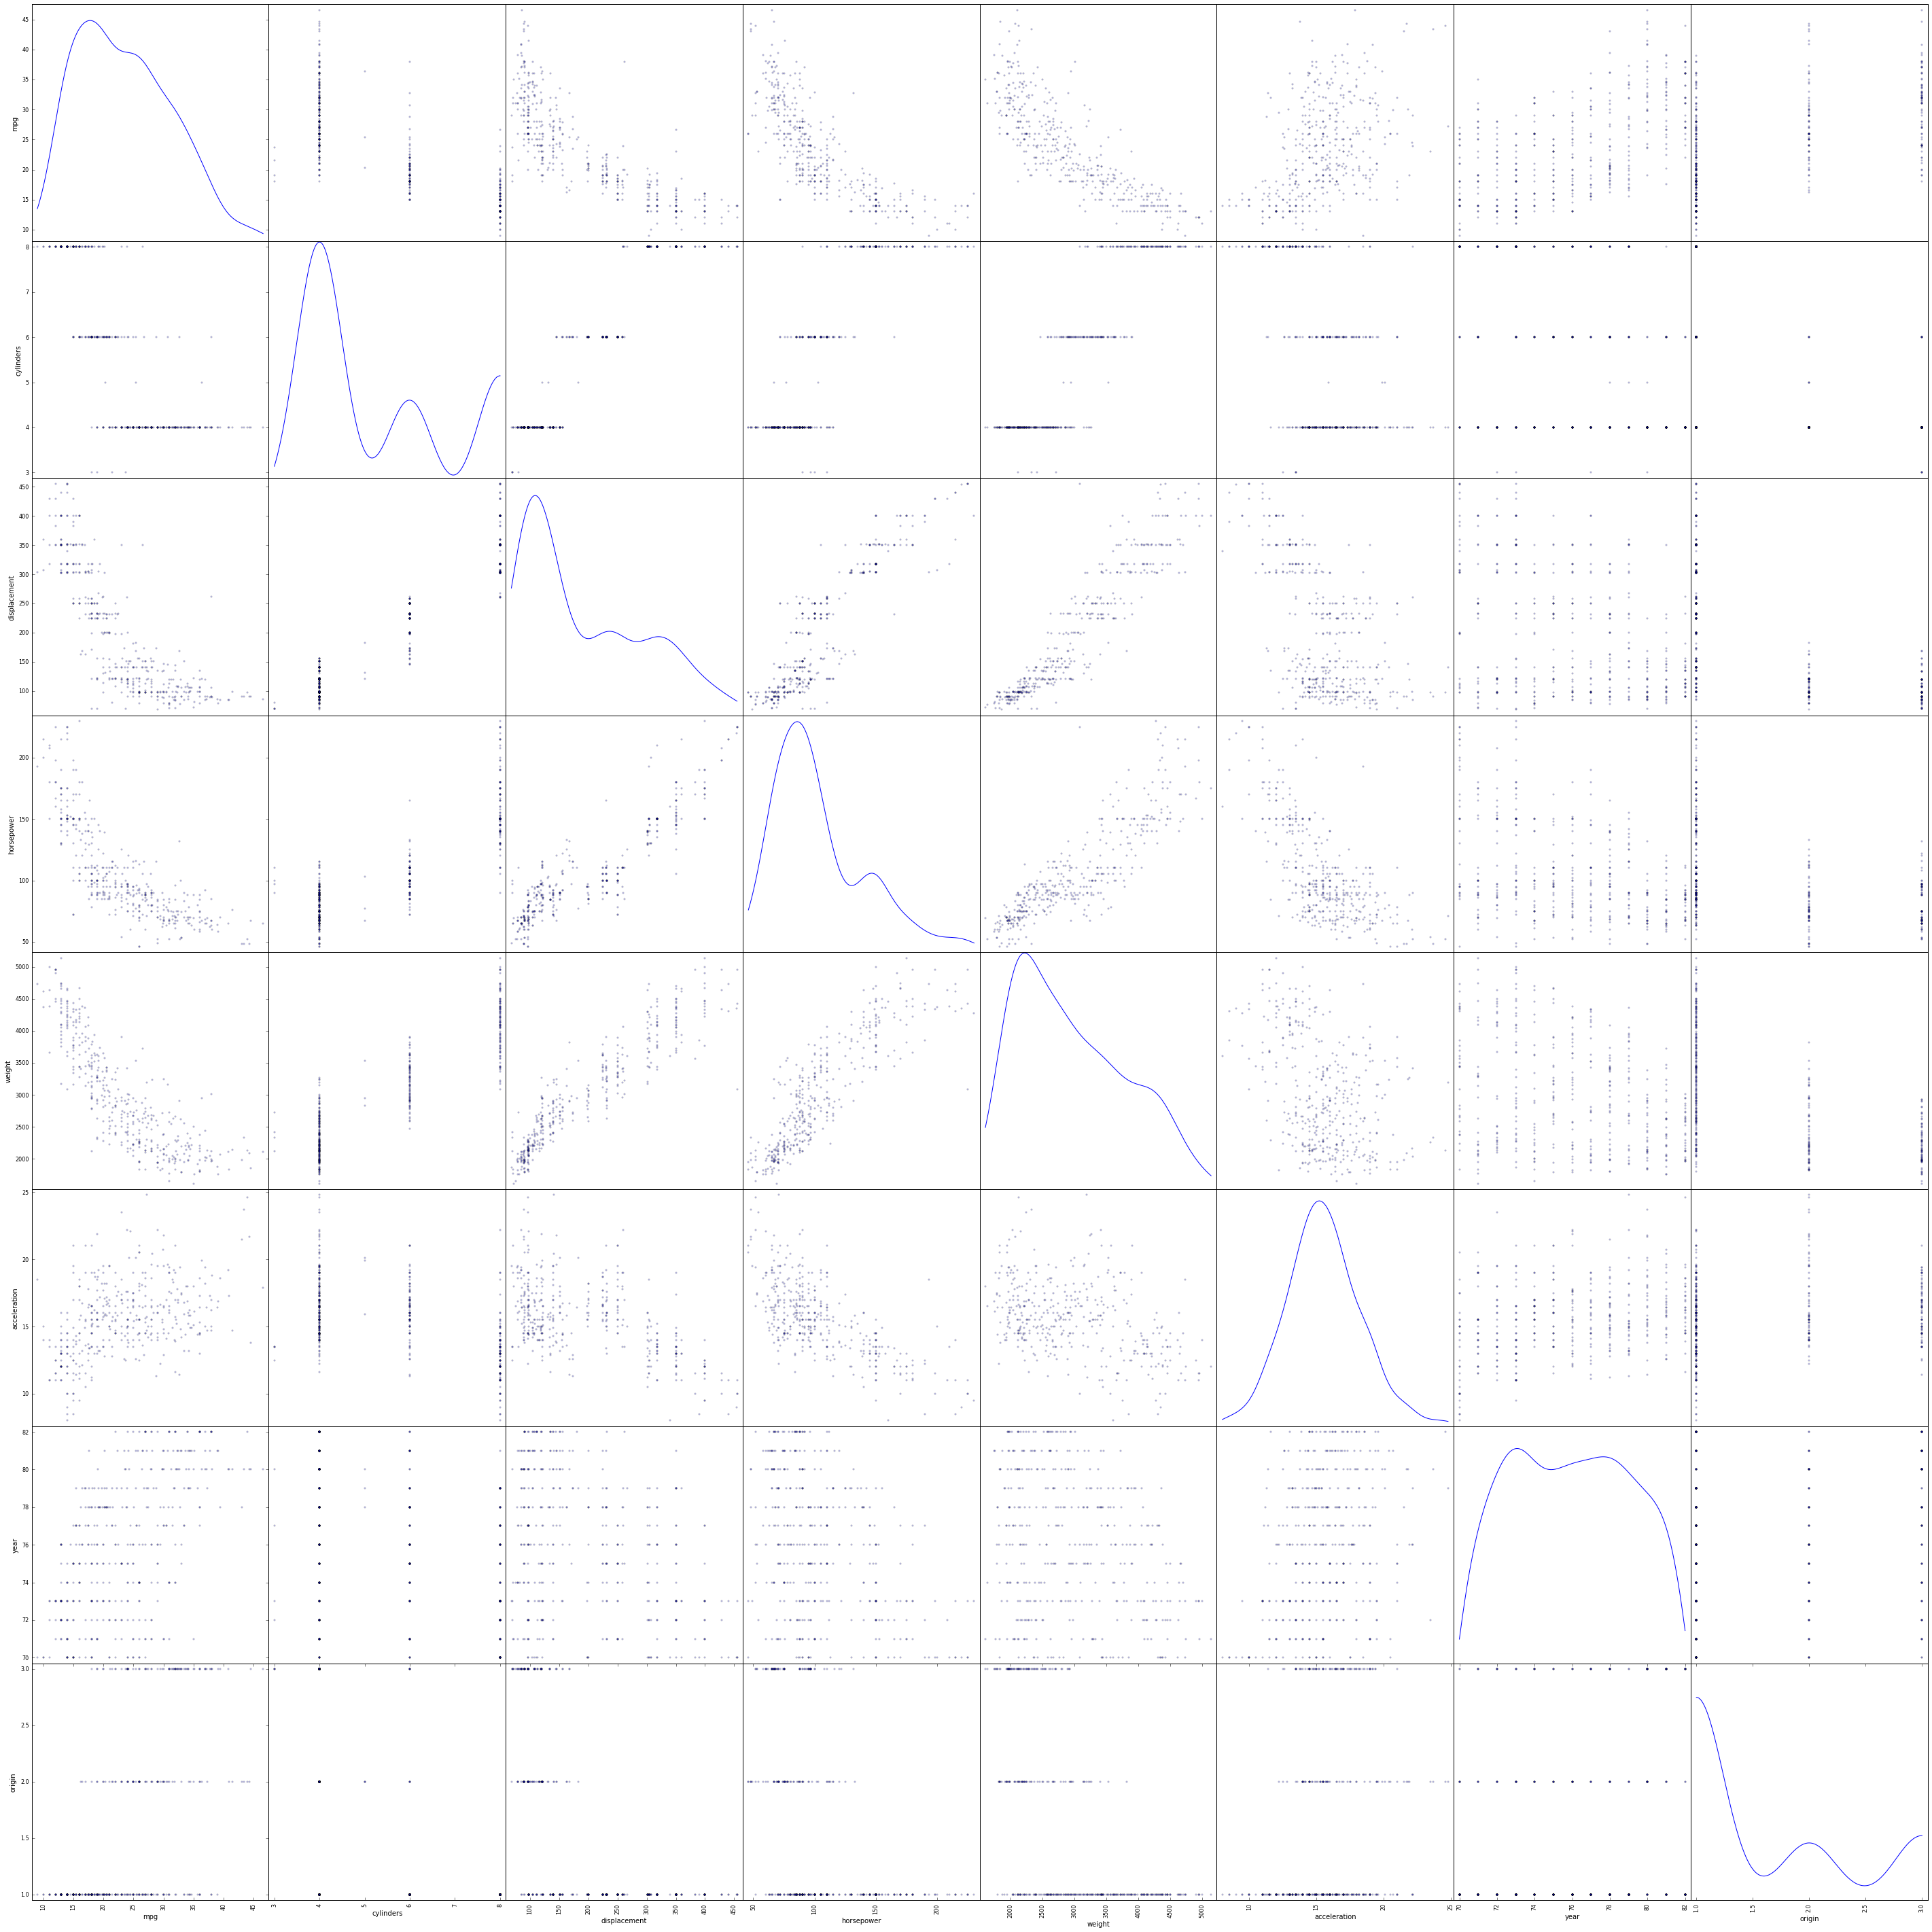

In [57]:
auto_scat_plot_matrix = pd.tools.plotting.scatter_matrix(auto, alpha=0.2, figsize=(50, 50), diagonal='kde') 
plt.savefig('Auto_scatter_matrix.png')

9

    f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.


yes - cylinders, displacement, horsepower, and weight can help predict mpg. Year and origin cannot. 

10) 

These exercises involve the boston housing data. 

    a) load the data into a dataframe: how many rows? how many columns? which features are categorical and which are quantitative? 

In [58]:
boston = pd.read_csv("Boston_Housing.csv")

In [59]:
print(boston.shape)
print(boston.describe())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

Looks like 14 predictors and 504 samples. 

    b) make pairwise scatterplot of the predictors. 

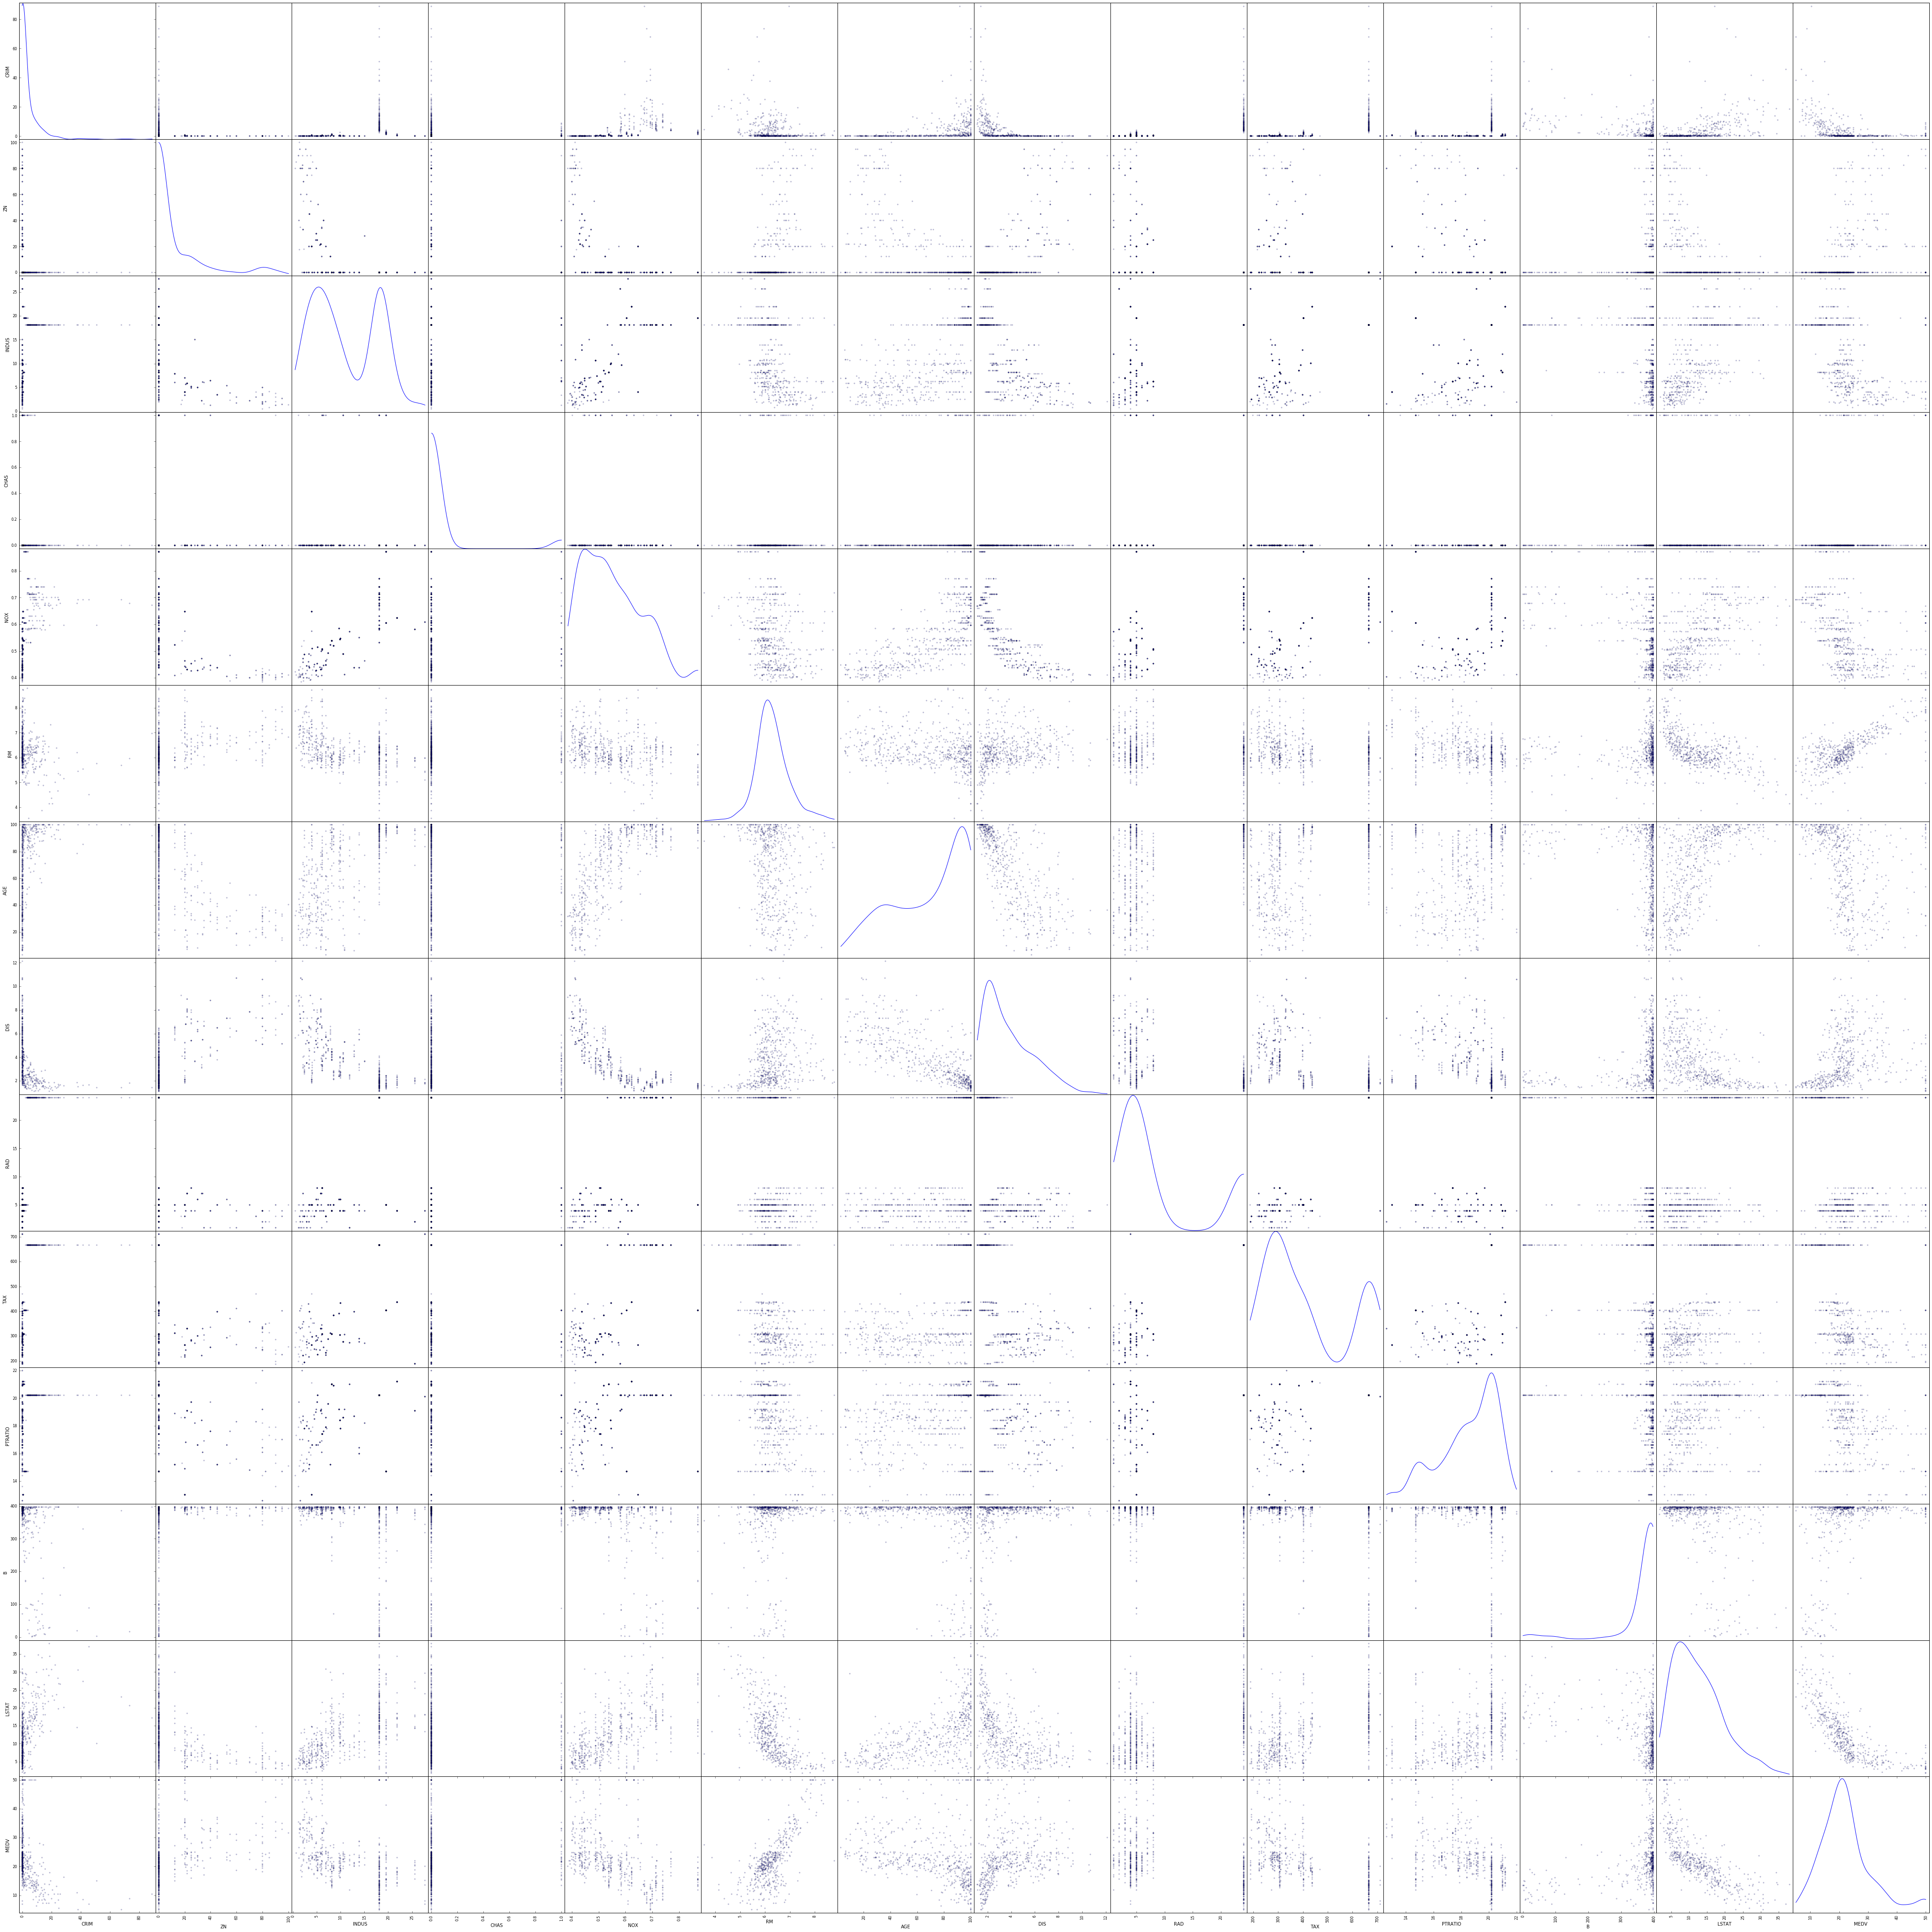

In [61]:
boston_scatter = pd.tools.plotting.scatter_matrix(boston, alpha = 0.2, figsize=(75,75), diagonal = "kde")
plt.savefig('boston_matrix.png')

    c) Are any of the predictors associated with with per capita crime rate? if so explain
    
        LSTAT (lower status of the population) has the biggest associated with crime rate. This makes logical sense. 

    d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor. In other words - create box plots of crime rates, tax rates and pupil-teacher ratio on data that is binned by suburbs. 

In [63]:
boston  # there is no categorical predictor for neighborhood! 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Experimental playground 